In [1]:
import psycopg2
import numpy as np
import pandas as pd

In [2]:
def create_database():
    conn=psycopg2.connect( host="localhost" , database="postgres" , user="postgres" , password="BFCAL2001")
    conn.set_session(autocommit=True)
    cur=conn.cursor()
    cur.execute("DROP DATABASE IF EXISTS accounts")
    cur.execute("CREATE DATABASE accounts")
    conn.close()
    
    conn=psycopg2.connect( host="localhost" , database="accounts" , user="postgres" , password="BFCAL2001")
    cur=conn.cursor()

    return cur,conn

**AccountsCountry**

In [3]:
accountscountry=pd.read_csv("E:\Python+SQL\Wealth-AccountsCountry.csv")
accountscountry.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2020 (expected),"Demographic and Health Survey, 2017/18",NaN,...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,2006.0,AL,AL,Albania,Albania
1,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,IBRD,NaN,Argentine peso,2020 (expected),"Multiple Indicator Cluster Survey, 2019/20",NaN,...,"Integrated household survey (IHS), 2016",Yes,2008,2002.0,2018.0,2011.0,AR,AR,Argentina,Argentina
2,ARM,Republic of Armenia,Upper middle income,Europe & Central Asia,IBRD,NaN,Armenian dram,2020 (expected),"Demographic and Health Survey, 2015/16",NaN,...,"Integrated household survey (IHS), 2016",Yes,2014,NaN,2018.0,2012.0,AM,AM,Armenia,Armenia
3,AUS,Commonwealth of Australia,High income,East Asia & Pacific,NaN,NaN,Australian dollar,2016,NaN,Fiscal year end: June 30; reporting period for...,...,"Expenditure survey/budget survey (ES/BS), 2010",Yes,2015-2016,2013.0,2018.0,2013.0,AU,AU,Australia,Australia
4,AUT,Republic of Austria,High income,Europe & Central Asia,NaN,Euro area,Euro,2011. Population figures compiled from adminis...,NaN,A simple multiplier is used to convert the nat...,...,"Income survey (IS), 2015",Yes,2010,2014.0,2018.0,2010.0,AT,AT,Austria,Austria


In [4]:
accountscountry_selected=accountscountry[["Code","Long Name","Income Group","Region","Currency Unit"]]
accountscountry_selected.head()

,Code,Long Name,Income Group,Region,Currency Unit
0,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,Albanian lek
1,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,Argentine peso
2,ARM,Republic of Armenia,Upper middle income,Europe & Central Asia,Armenian dram
3,AUS,Commonwealth of Australia,High income,East Asia & Pacific,Australian dollar
4,AUT,Republic of Austria,High income,Europe & Central Asia,Euro


In [5]:
accountscountry_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           7592 non-null   object
 1   Long Name      7594 non-null   object
 2   Income Group   7593 non-null   object
 3   Region         146 non-null    object
 4   Currency Unit  146 non-null    object
dtypes: object(5)
memory usage: 296.9+ KB


In [6]:
sum(accountscountry_selected.duplicated())

7304

In [7]:
accountscountry_selected.drop_duplicates(inplace=True)

C:\Users\GO\AppData\Local\Temp\ipykernel_16160\3897668536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accountscountry_selected.drop_duplicates(inplace=True)


In [8]:
len(accountscountry_selected)

293

In [9]:
accountscountry_selected=accountscountry_selected[~ accountscountry_selected["Code"].isnull() ]
accountscountry_selected

,Code,Long Name,Income Group,Region,Currency Unit
0,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,Albanian lek
1,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,Argentine peso
2,ARM,Republic of Armenia,Upper middle income,Europe & Central Asia,Armenian dram
3,AUS,Commonwealth of Australia,High income,East Asia & Pacific,Australian dollar
4,AUT,Republic of Austria,High income,Europe & Central Asia,Euro
...,...,...,...,...,...
7332,VNM,Vietnam,Vietnam,NaN,NaN
7384,PSE,West Bank and Gaza,West Bank and Gaza,NaN,NaN
7436,YEM,Yemen,Yemen,NaN,NaN
7488,ZMB,Zambia,Zambia,NaN,NaN


In [10]:
accountscountry_selected.reset_index(inplace=True)
x=accountscountry_selected.groupby("Code")["index"].apply(list)

In [11]:
lis=[]
for i in x.values:
    if len(i)>1:
        lis.append(i[1])
print(lis)

[7072, 146, 156, 208, 260, 936, 468, 572, 884, 364, 832, 312, 676, 416, 520, 624, 780, 728, 1144, 1092, 6448, 1248, 1300, 1664, 1040, 1716, 1456, 1352, 1404, 1508, 1612, 2444, 1820, 1768, 1872, 1924, 1976, 6240, 2080, 2184, 2236, 2288, 2340, 7124, 2392, 2496, 2652, 6656, 2548, 2600, 2704, 2808, 1560, 2756, 2860, 3016, 2964, 3172, 3068, 3120, 2912, 3224, 3276, 3380, 3328, 3432, 3484, 3640, 988, 3536, 3588, 3692, 3796, 3900, 6292, 3848, 3952, 4004, 3744, 4628, 4524, 4056, 4212, 4472, 5044, 4264, 4316, 4576, 4680, 4368, 4420, 4108, 4160, 4732, 4940, 4992, 4888, 4836, 5096, 4784, 5148, 5200, 5252, 5408, 5460, 5304, 5512, 5564, 5356, 7384, 5616, 5668, 5720, 5772, 5824, 5876, 5980, 6136, 5928, 2028, 6344, 6032, 6084, 6396, 2132, 1196, 6708, 6604, 6500, 6916, 6760, 6812, 6864, 6552, 6968, 7020, 7228, 7176, 7280, 7332, 7436, 6188, 7488, 7540]


In [12]:
accountscountry_selected=accountscountry_selected[ ~accountscountry_selected["index"].isin(lis) ].drop("index",axis=1)
accountscountry_selected.head()

,Code,Long Name,Income Group,Region,Currency Unit
0,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,Albanian lek
1,ARG,Argentine Republic,Upper middle income,Latin America & Caribbean,Argentine peso
2,ARM,Republic of Armenia,Upper middle income,Europe & Central Asia,Armenian dram
3,AUS,Commonwealth of Australia,High income,East Asia & Pacific,Australian dollar
4,AUT,Republic of Austria,High income,Europe & Central Asia,Euro


**AccountData**

In [13]:
accountsdata=pd.read_csv("E:\Python+SQL\Wealth-AccountData.csv")
accountsdata.head()

,Country Name,Country Code,Series Name,Series Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Albania,ALB,Human capital (constant 2018 US$),NW.HCA.TO,4.49E+10,4.34E+10,3.71E+10,3.88E+10,4.22E+10,4.36E+10,...,6.610000e+10,6.810000e+10,6.850000e+10,7.080000e+10,7.160000e+10,7.250000e+10,7.370000e+10,7.57E+10,7.80E+10,8.12E+10
1,Albania,ALB,Human capital per capita (constant 2018 US$),NW.HCA.PC,14072.79,13708.99,11794.1,12399.48,13573.26,14118.13,...,2.258200e+04,2.336286e+04,2.359058e+04,2.439397e+04,2.473162e+04,2.509002e+04,2.559371e+04,26326.26,27160.86,28333.68
2,Albania,ALB,"Human capital per capita, employed female (con...",NW.HCA.FEMP.PC,3468.858,3355.549,2868.997,3013.391,3259.893,3424.007,...,2.825336e+03,2.889150e+03,2.848523e+03,2.930234e+03,2.954273e+03,2.957420e+03,2.987545e+03,3072.504,3178.417,3312.927
3,Albania,ALB,"Human capital per capita, employed male (const...",NW.HCA.MEMP.PC,6507.931,6353.737,5466.692,5901.072,6492.73,6872.019,...,1.525319e+04,1.578992e+04,1.579854e+04,1.647360e+04,1.681013e+04,1.699138e+04,1.730701e+04,17817.1,18445.94,19245.19
4,Albania,ALB,"Human capital per capita, female (constant 201...",NW.HCA.FEMA.PC,4893.006,4737.857,4059.321,4191.445,4536.972,4695.071,...,3.529144e+03,3.613606e+03,3.603694e+03,3.683810e+03,3.696744e+03,3.719608e+03,3.767628e+03,3872.142,3992.188,4161.137


In [14]:
accountsdata_unpivot = pd.melt(accountsdata, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                     value_vars=['1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]'])
accountsdata_unpivot.rename({"variable":"Year"},axis=1,inplace=True)
accountsdata_unpivot.head()

,Country Name,Country Code,Series Name,Series Code,Year,value
0,Albania,ALB,Human capital (constant 2018 US$),NW.HCA.TO,1995 [YR1995],4.49E+10
1,Albania,ALB,Human capital per capita (constant 2018 US$),NW.HCA.PC,1995 [YR1995],14072.79
2,Albania,ALB,"Human capital per capita, employed female (con...",NW.HCA.FEMP.PC,1995 [YR1995],3468.858
3,Albania,ALB,"Human capital per capita, employed male (const...",NW.HCA.MEMP.PC,1995 [YR1995],6507.931
4,Albania,ALB,"Human capital per capita, female (constant 201...",NW.HCA.FEMA.PC,1995 [YR1995],4893.006


In [15]:
accountsdata_unpivot["ID"]=np.arange(1,182209)

In [16]:
accountsdata_unpivot.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year',
       'value', 'ID'],
      dtype='object')

In [17]:
def year(y):
    return y[0:5]

accountsdata_unpivot['Year']=accountsdata_unpivot['Year'].apply(year).astype(int)

In [18]:
accountsdata_unpivot=accountsdata_unpivot[["ID",'Country Code','Country Name', 'Series Code','Series Name',"Year","value"]]
accountsdata_unpivot.head()

,ID,Country Code,Country Name,Series Code,Series Name,Year,value
0,1,ALB,Albania,NW.HCA.TO,Human capital (constant 2018 US$),1995,4.49E+10
1,2,ALB,Albania,NW.HCA.PC,Human capital per capita (constant 2018 US$),1995,14072.79
2,3,ALB,Albania,NW.HCA.FEMP.PC,"Human capital per capita, employed female (con...",1995,3468.858
3,4,ALB,Albania,NW.HCA.MEMP.PC,"Human capital per capita, employed male (const...",1995,6507.931
4,5,ALB,Albania,NW.HCA.FEMA.PC,"Human capital per capita, female (constant 201...",1995,4893.006


**AccountSeries**

In [19]:
accountseries=pd.read_csv("E:\Python+SQL\Wealth-AccountSeries.csv")
accountseries.head()

,Code,Indicator Name,Long definition,Source,Topic,Unit of measure,Periodicity,Reference period,Statistical concept and methodology,Previous Indicator Code,Previous Indicator Name
0,NW.HCA.TO,Human capital (constant 2018 US$),Human capital is computed as the present value...,World Bank. 2021. The Changing Wealth of Natio...,Human capital,Constant 2018 US$,Annual,1995-2018,Total wealth is calculated by summing up estim...,NaN,NaN
1,NW.HCA.PC,Human capital per capita (constant 2018 US$),Human capital is computed as the present value...,World Bank. 2021. The Changing Wealth of Natio...,Human capital,Constant 2018 US$,Annual,1995-2018,Total wealth is calculated by summing up estim...,NaN,NaN
2,NW.HCA.FEMP.PC,"Human capital per capita, employed female (con...",Human capital is computed as the present value...,World Bank. 2021. The Changing Wealth of Natio...,Human capital,Constant 2018 US$,Annual,1995-2018,Total wealth is calculated by summing up estim...,NaN,NaN
3,NW.HCA.MEMP.PC,"Human capital per capita, employed male (const...",Human capital is computed as the present value...,World Bank. 2021. The Changing Wealth of Natio...,Human capital,Constant 2018 US$,Annual,1995-2018,Total wealth is calculated by summing up estim...,NaN,NaN
4,NW.HCA.FEMA.PC,"Human capital per capita, female (constant 201...",Human capital is computed as the present value...,World Bank. 2021. The Changing Wealth of Natio...,Human capital,Constant 2018 US$,Annual,1995-2018,Total wealth is calculated by summing up estim...,NaN,NaN


In [20]:
accountseries.columns

Index(['Code', 'Indicator Name', 'Long definition', 'Source', 'Topic',
       'Unit of measure', 'Periodicity', 'Reference period',
       'Statistical concept and methodology', 'Previous Indicator Code',
       'Previous Indicator Name'],
      dtype='object')

In [21]:
accountseries=accountseries[["Code","Indicator Name","Long definition","Topic","Periodicity"]]
accountseries.head()

,Code,Indicator Name,Long definition,Topic,Periodicity
0,NW.HCA.TO,Human capital (constant 2018 US$),Human capital is computed as the present value...,Human capital,Annual
1,NW.HCA.PC,Human capital per capita (constant 2018 US$),Human capital is computed as the present value...,Human capital,Annual
2,NW.HCA.FEMP.PC,"Human capital per capita, employed female (con...",Human capital is computed as the present value...,Human capital,Annual
3,NW.HCA.MEMP.PC,"Human capital per capita, employed male (const...",Human capital is computed as the present value...,Human capital,Annual
4,NW.HCA.FEMA.PC,"Human capital per capita, female (constant 201...",Human capital is computed as the present value...,Human capital,Annual


**Create DB**

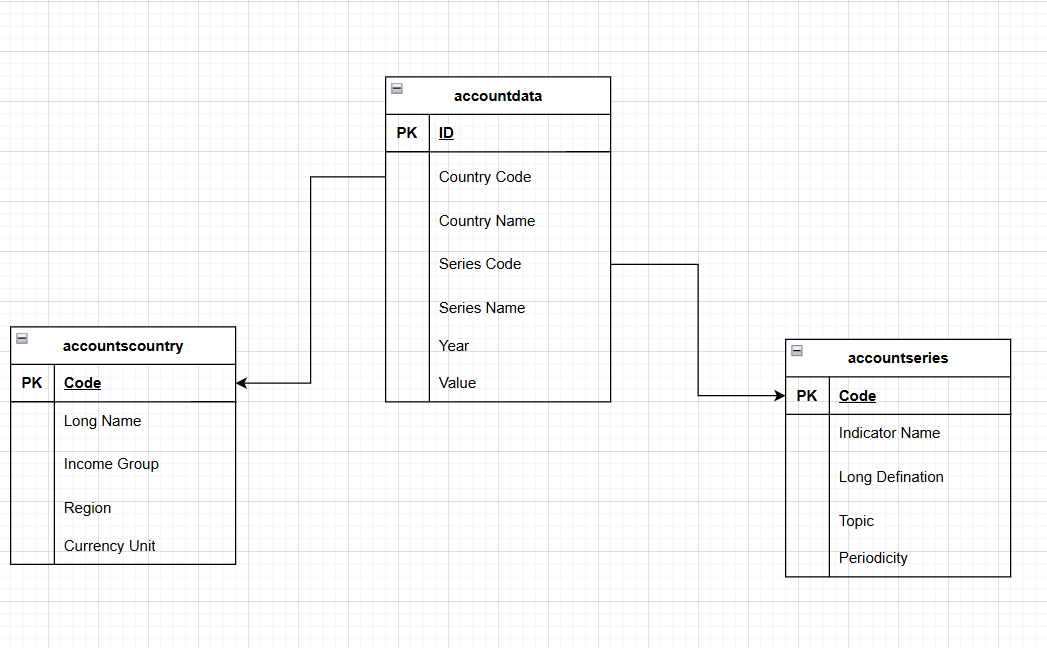

In [22]:
cur,conn=create_database()

In [23]:
accounts_country_table=(""" CREATE TABLE IF NOT EXISTS accounts_country(
          Code VARCHAR PRIMARY KEY ,
          Long_Name VARCHAR,
          Income_Group VARCHAR,
          Region VARCHAR,
          Currency_Unit VARCHAR
);

""")

cur.execute(accounts_country_table)
conn.commit()

In [24]:
accounts_series_table=(""" CREATE TABLE IF NOT EXISTS accounts_series(
       Code VARCHAR PRIMARY KEY,
       Indicator_Name VARCHAR ,
       Long_definition VARCHAR,
       Topic VARCHAR,
       Periodicity VARCHAR

);
""")

cur.execute(accounts_series_table)
conn.commit()

In [25]:
accounts_data_table=(""" CREATE TABLE IF NOT EXISTS accounts_data(
       ID INT PRIMARY KEY,
       Country_Code VARCHAR ,
       Country_Name VARCHAR,
       Series_Code VARCHAR,
       Series_Name VARCHAR, 
       Year INT, 
       value VARCHAR,
       CONSTRAINT FK_CCODE FOREIGN KEY (Country_Code) REFERENCES accounts_country(Code),
       CONSTRAINT FK_SCODE FOREIGN KEY (Series_Code)  REFERENCES accounts_series(Code)
);

""")

cur.execute(accounts_data_table)
conn.commit()

In [26]:
accountscountry_insert=(""" 
   INSERT INTO accounts_country (Code , Long_Name , Income_Group, Region, Currency_Unit)
   VALUES(%s,%s,%s,%s,%s)
""")

for i , row in accountscountry_selected.iterrows():
    cur.execute(accountscountry_insert,list(row))
conn.commit()

In [27]:
accountseries_insert=(""" 
   INSERT INTO accounts_series (Code ,Indicator_Name ,  Long_definition ,Topic , Periodicity )
   VALUES(%s,%s,%s,%s,%s)
""")

for i , row in accountseries.iterrows():
    cur.execute(accountseries_insert,list(row))
conn.commit()

In [28]:
accountsdata_insert=(""" 
   INSERT INTO accounts_data (ID ,Country_Code  ,Country_Name ,Series_Code ,Series_Name , Year , value )
   VALUES(%s,%s,%s,%s,%s,%s,%s)
""")

for i , row in accountsdata_unpivot.iterrows():
    cur.execute(accountsdata_insert,list(row))
conn.commit()

In [29]:
conn.close()